# Linear regression

In this notebook, we implement an algorithm of linear regression with a single feature.<br>
For the cost function, we use the mean squared error function, which is defined as
$$C(x) = \frac{1}{2m}\sum_{i}^{m} \left(a_0+a_1 x^{(i)}_1-y^{(i)}\right)^2,$$
where $x^{(i)}$ and $y^{(i)}$ are the training data, $m$ the number of training data, and $\{a_0,a_1\}$ the fitting parameters.

The fitting parameters are optimized using gradient descent,
$$
a_0^{\mathrm{new}} = a_0 - \eta \frac{\partial C}{\partial a_0},\qquad
a_1^{\mathrm{new}} = a_1 - \eta \frac{\partial C}{\partial a_1}.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression():
    """
    It fits data with a linear fit function.
    It minimizes the cost function using gradient descent
    in order to find the fit parameters.
    x   : input training data
    y   : output training data
    eta : learning rate
    N   : total # of iterations
    """
    def __init__(self):
        """
        Initializing the setup.
        a0 : 0th order parameter
        a1 : 1st order parameter
        """
        self.a0 = np.random.randn()
        self.a1 = np.random.randn()
        self.costs = []
    
    def fit_func(self,x):
        """
        Linear fit function
        """
        return self.a0 + self.a1*x

    def cost(self,x,y):
        """
        The mean squared error function
        """
        return 0.5*np.average((self.fit_func(x) - y)**2)

    def del_cost(self,x,y):
        """
        Derivative of the cost function with respect to a0
        """
        return self.fit_func(x)-y

    def update(self,x,y,eta):
        """
        Updating the fitting paramters using gradient descent.
        """
        temp0 = self.a0 - eta*np.average(self.del_cost(x,y))
        temp1 = self.a1 - eta*np.average(self.del_cost(x,y)*x)
        self.a0 = temp0
        self.a1 = temp1
    
    def run(self,x,y,eta,N):
        """
        Iterating the update function as well as calculating the cost.
        """
        for i in range(N):
            self.update(x,y,eta)
            self.costs.append(self.cost(x,y))   

In [3]:
# Preparing training dataset
X    = np.random.randn(1000)
Y = 3*X+np.random.randn(1000)

In [4]:
LR = LinearRegression()
LR.run(X,Y,0.1,100)

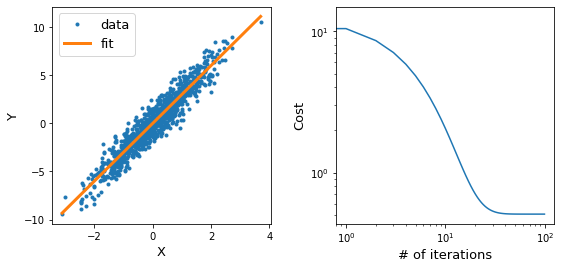

In [5]:
fit_x = np.linspace(X.min(),X.max(),100)
fig, (ax0,ax1) = plt.subplots(1,2,figsize = (9,4))
plt.subplots_adjust(wspace=0.3)
ax0.plot(X,Y,'.', label = 'data')
ax0.plot(fit_x, LR.fit_func(fit_x),linewidth=3, label = 'fit')
ax0.legend(fontsize=13)
ax0.set_xlabel('X',fontsize = 13)
ax0.set_ylabel('Y',fontsize = 13)
ax1.plot(LR.costs)
ax1.set_xlabel('# of iterations',fontsize = 13)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Cost',fontsize = 13)
plt.show()